In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = ("data/city_data.csv")
ride_data_to_load = ("data/ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)

ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on='city')
# Display the data table for preview
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
#Average Fare ($) Per City
AverageFare = combined_data.groupby('city')["fare"].mean().round(2)


#Total Number of Rides Per City
TotalRides = combined_data.groupby('city')["ride_id"].count()


#Total Number of Drivers Per City
TotalDrivers = combined_data.groupby('city')["driver_count"].mean()


#City Type (Urban, Suburban, Rural)
CityType = combined_data.groupby('city')["type"].max()

In [5]:
#Create new dataframe with normalized data
PyberDF = pd.DataFrame({"Fare": AverageFare,
                         "Number of Rides": TotalRides,
                         "Number of Drivers": TotalDrivers,
                         "Type": CityType})

PyberDF.head()


,Fare,Number of Rides,Number of Drivers,Type
city,,,,
Amandaburgh,24.64,18,12,Urban
Barajasview,25.33,22,26,Urban
Barronchester,36.42,16,11,Suburban
Bethanyland,32.96,18,22,Suburban
Bradshawfurt,40.06,10,7,Rural


## Bubble Plot of Ride Sharing Data

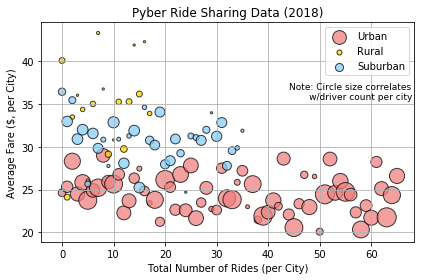

In [7]:
# Obtain the x and y coordinates for each of the three city types
#urban cities
urbancities = combined_data.loc[combined_data["type"] == "Urban",:]
urbancities_mean = urbancities.groupby(["city"]).mean()

x_urban = urbancities["city"].value_counts()
y_urban = urbancities_mean["fare"]
z_urban = urbancities_mean["driver_count"]

x_urban_axis = np.arange(0, len(x_urban), 1)
#Rural cities
ruralcities = combined_data.loc[combined_data["type"] == "Rural",:]
ruralcities_mean = ruralcities.groupby(["city"]).mean()

x_rural = ruralcities["city"].value_counts()
y_rural = ruralcities_mean["fare"]
z_rural = ruralcities_mean["driver_count"]

x_rural_axis = np.arange(0, len(x_rural), 1)
#Suburban cities
suburbancities = combined_data.loc[combined_data["type"] == "Suburban",:]
suburbancities_mean = suburbancities.groupby(["city"]).mean()

x_suburban = suburbancities["city"].value_counts()
y_suburban = suburbancities_mean["fare"]
z_suburban = suburbancities_mean["driver_count"]

x_suburban_axis = np.arange(0, len(x_suburban), 1)
# Build the scatter plots for each city types
urbanscatter = plt.scatter(x_urban_axis, y_urban, s=z_urban*5,
            marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
ruralscatter = plt.scatter(x_rural_axis, y_rural, s=z_rural*5,
            marker="o", facecolors="gold", edgecolors="black", alpha=0.75)
suburbanscatter = plt.scatter(x_suburban_axis, y_suburban, s=z_suburban*5,
            marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($, per City)")
plt.grid()
plt.tight_layout()
# Create a legend
plt.legend((urbanscatter, ruralscatter, suburbanscatter), ('Urban', 'Rural', 'Suburban'))
# Incorporate a text label regarding circle size
plt.text(44, 35.5, "Note: Circle size correlates \n       w/driver count per city", fontsize=9)

# Save Figure
plt.savefig("pyber_bubble_plot.png")

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

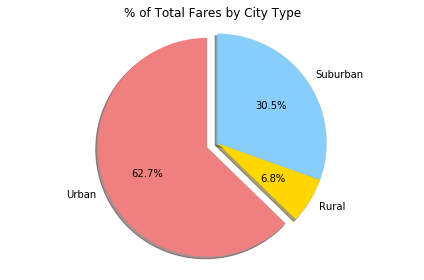

In [9]:
# Calculate Type Percents
urbantotalfare = combined_data.loc[combined_data["type"] == "Urban","fare"].sum()
ruraltotalfare = combined_data.loc[combined_data["type"] == "Rural","fare"].sum()
suburbantotalfare = combined_data.loc[combined_data["type"] == "Suburban","fare"].sum()

citytype = ["Urban", "Rural", "Suburban"]
totalfare = [urbantotalfare, ruraltotalfare, suburbantotalfare]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1,0,0)
# Build Pie Chart
plt.pie(totalfare, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.tight_layout()
# Save Figure
plt.savefig("totalfares_pieplot.png")



In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

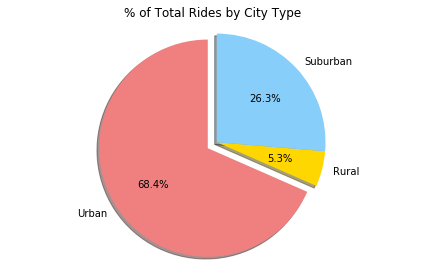

In [11]:
# Calculate Ride Percents
urbanridecount = combined_data.loc[combined_data["type"] == "Urban","ride_id"].count()
ruralridecount = combined_data.loc[combined_data["type"] == "Rural","ride_id"].count()
suburbanridecount = combined_data.loc[combined_data["type"] == "Suburban","ride_id"].count()

citytype = ["Urban", "Rural", "Suburban"]
ridecount = [urbanridecount, ruralridecount, suburbanridecount]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1,0,0)
# Build Pie Chart
plt.pie(ridecount, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.tight_layout()
# Save Figure
plt.savefig("totalrides_pieplot.png")


In [12]:
# Show Figure
plt.show()

## Total Drivers by City Type

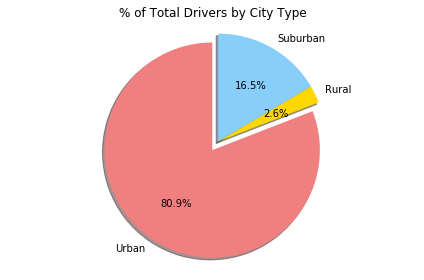

In [14]:
# Calculate Driver Percents
urbantotaldrivers = city_data.loc[city_data["type"] == "Urban","driver_count"].sum()
ruraltotaldrivers = city_data.loc[city_data["type"] == "Rural","driver_count"].sum()
suburbantotaldrivers = city_data.loc[city_data["type"] == "Suburban","driver_count"].sum()

citytype = ["Urban", "Rural", "Suburban"]
totaldrivers = [urbantotaldrivers, ruraltotaldrivers, suburbantotaldrivers]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1,0,0)
#Build pie charts
plt.pie(totaldrivers, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.tight_layout()
# Save Figure
plt.savefig("totaldrivers_pieplot.png")


In [13]:
# Show Figure
plt.show()